## Final Project Submission

Please fill out:
* Student name: Christopher Hollman
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


In [58]:
#importing neccessary tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
#importing data
kc = pd.read_csv('data/kc_house_data.csv')
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Some missing values here for year renovated, view, and, waterfront.
At this point we will drop columns that we wont be using

In [4]:
kc.drop(['id', 
        'sqft_above', 
        'sqft_basement', 
        'lat', 
        'long', 
        'sqft_living15',
        'sqft_lot15'],
        axis = 1, inplace = True)

In [5]:
kc['sale_yr'] = kc['date'].str[-4:].astype(int) 
kc['sale_age'] = kc['sale_yr'] - kc['yr_built']
kc['sale_month'] = pd.to_datetime(kc['date']).dt.strftime("%b")
kc.drop(['yr_built', 'sale_yr', 'date'], axis=1, inplace=True)


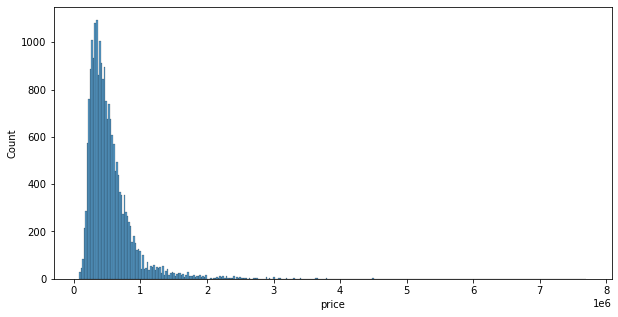

In [6]:

fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(kc['price']);
        

In [7]:
iqr=stats.iqr(kc['price'])
q75, q25 = np.percentile(kc['price'], [75 ,25])

low_limit = q25 - (1.5 * iqr)
high_limit = q75 + (1.5* iqr)
print("Lower Limit: ",low_limit)
print("Upper Limit: ",high_limit)

Lower Limit:  -162500.0
Upper Limit:  1129500.0


In [8]:
kc = kc[kc['price'] <= high_limit]
kc['price'].max()

1120000.0

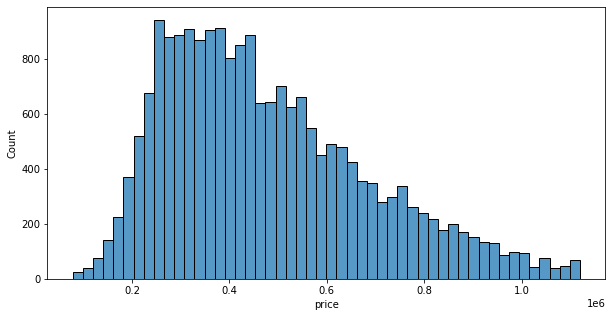

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(kc['price']);

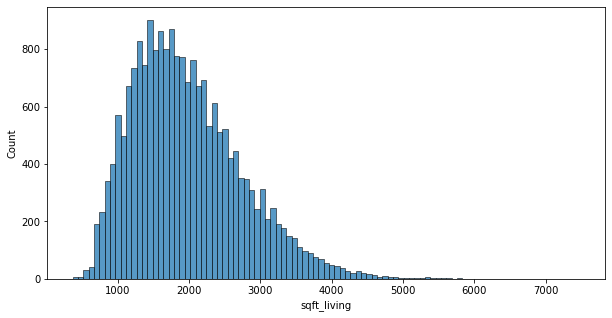

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(kc['sqft_living']);

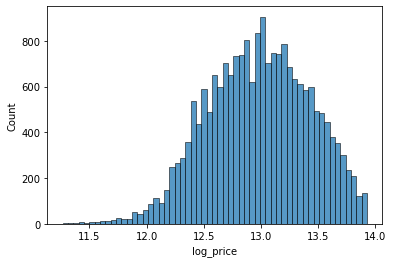

In [11]:
kc['log_price'] = np.log(kc['price'])
sns.histplot(kc['log_price']);


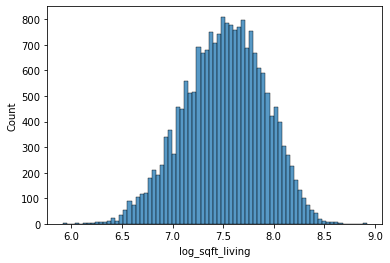

In [12]:
kc['log_sqft_living'] = np.log(kc['sqft_living'])
sns.histplot(kc['log_sqft_living']);

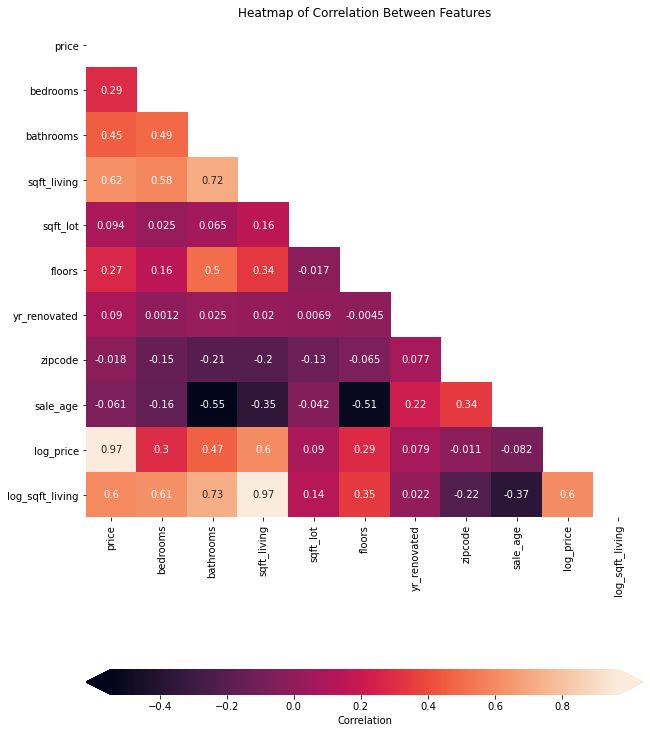

In [13]:
corr = kc.corr()

fig, ax = plt.subplots(figsize=(10, 14))

sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)
ax.set_title("Heatmap of Correlation Between Features");

In [14]:
initial_features = ['bathrooms', 'log_sqft_living']

In [15]:
outcome = 'log_price'
predictors = kc[initial_features]
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=kc).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     5907.
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:34:38   Log-Likelihood:                -7801.4
No. Observations:               20439   AIC:                         1.561e+04
Df Residuals:                   20436   BIC:                         1.563e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.1234      0.062    131.756      0.000       8.003       8.244
bathrooms           0.0310      0.005      6.046      0.000       0.021       0.041
log_sqft_living     0.6379      0.009     69.577      0.000       0.620       0.656
==============================================================================
Omnibus:                      400.913   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.581
Skew:                          -0.112   Prob(JB):                     2.11e-53
Kurtosis:                       2.516   Cond. No.                         198.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
kc_X=kc[initial_features]
kc_y=kc['log_price']
initial_model = LinearRegression()
splitter = ShuffleSplit(n_splits=5, test_size=0.4, random_state=7)
baseline_scores = cross_validate(
    estimator=initial_model,
    X=kc_X,
    y=kc_y,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.36876959554635746
Validation score: 0.3625666905459722


In [17]:
kc.isnull().sum()

price                 0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront         2269
view                 58
condition             0
grade                 0
yr_renovated       3627
zipcode               0
sale_age              0
sale_month            0
log_price             0
log_sqft_living       0
dtype: int64

In [18]:
kc['waterfront'] = kc['waterfront'].fillna(0).replace('NO', 0).replace('YES', 1)

In [19]:
kc['view'] = kc['view'].fillna(1).replace(
    'NONE', 1).replace(
    'FAIR', 2).replace(
    'AVERAGE', 3).replace(
    'GOOD', 4).replace(
    'EXCELLENT', 5)
kc['view'].value_counts()

1    18868
3      804
4      347
2      274
5      146
Name: view, dtype: int64

In [20]:
kc['condition'].value_counts()

Average      13268
Good          5415
Very Good     1560
Fair           168
Poor            28
Name: condition, dtype: int64

In [21]:
kc['condition'] = kc['condition'].replace(
    'Poor', 1).replace(
    'Fair', 2).replace(
    'Average', 3).replace(
    'Good', 4).replace(
    'Very Good', 5)

In [22]:
kc['grade'] = kc['grade'].str[:2].astype(int)-2
kc['grade'].value_counts()

5     8962
6     5943
7     2319
4     2037
8      766
3      242
9      137
2       27
10       5
1        1
Name: grade, dtype: int64

In [23]:
kc['yr_renovated'].isnull().sum()

3627

In [24]:
kc['yr_renovated'] = kc['yr_renovated'].fillna(0)
kc['yr_renovated'].value_counts()

0.0       19814
2014.0       66
2013.0       29
2000.0       26
2007.0       24
          ...  
1934.0        1
1950.0        1
1953.0        1
1948.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [25]:
kc['yr_renovated'].values[kc['yr_renovated'] > 1] = 1

In [26]:
kc['yr_renovated'].value_counts()

0.0    19814
1.0      625
Name: yr_renovated, dtype: int64

In [27]:
kc.rename(columns={'yr_renovated':'is_renovated'}, inplace=True)

In [28]:
kc['price'].mean()

476702.6321248593

In [29]:
zip_means = kc.groupby('zipcode').mean()
zip_means.sort_values('price')
zip_means['zip_minus_pop'] = np.abs(zip_means['price'] - kc['price'].mean())
zip_means.sort_values('zip_minus_pop')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,is_renovated,sale_age,log_price,log_sqft_living,zip_minus_pop
zipcode,,,,,,,,,,,,,,,
98034,474312.372624,3.467681,2.085076,1913.684411,8928.220532,1.297529,0.000000,1.117871,3.380228,5.412548,0.005703,38.387833,13.029482,7.499655,2390.259501
98070,474153.878261,2.773913,1.893478,1869.121739,97048.191304,1.417391,0.156522,2.060870,3.686957,5.252174,0.052174,46.469565,13.008124,7.452835,2548.753864
98024,486844.794521,3.232877,2.010274,2097.465753,84140.657534,1.356164,0.000000,1.150685,3.273973,5.315068,0.054795,45.931507,13.014618,7.543849,10142.162396
98059,465147.444690,3.699115,2.299226,2324.579646,14470.214602,1.618363,0.000000,1.039823,3.407080,5.783186,0.017699,25.882743,12.987605,7.690852,11555.187435
98011,490377.107692,3.548718,2.278205,2253.097436,11314.138462,1.502564,0.000000,1.061538,3.220513,5.774359,0.020513,32.123077,13.074285,7.670594,13674.475567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98075,730011.390909,3.839394,2.669697,2921.778788,17571.321212,1.796970,0.000000,1.190909,3.212121,6.918182,0.012121,20.690909,13.480651,7.945468,253308.758784
98005,744201.769737,3.809211,2.345395,2510.197368,17707.532895,1.236842,0.000000,1.078947,3.730263,6.263158,0.019737,46.105263,13.497228,7.781730,267499.137612
98004,836026.655844,3.428571,1.933442,1991.038961,10783.727273,1.269481,0.000000,1.038961,3.629870,5.649351,0.051948,52.714286,13.621263,7.547439,359324.023719


In [30]:
kc.loc[kc['zipcode'] == 98034, 'zipcode'].count()

526

In [31]:
kc.loc[kc['zipcode'] == 98070, 'zipcode'].count()

115

In [32]:
month_means = kc.groupby('sale_month').mean()
month_means.sort_values('price')
month_means['month_minus_pop'] = np.abs(month_means['price'] - kc['price'].mean())
month_means.sort_values('month_minus_pop')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,is_renovated,zipcode,sale_age,log_price,log_sqft_living,month_minus_pop
sale_month,,,,,,,,,,,,,,,,
Aug,476605.881365,3.314735,2.060672,1984.683099,14158.032503,1.479686,0.001083,1.159263,3.442037,5.561213,0.029794,98077.685807,42.439870,12.981146,7.520816,96.750760
Mar,478307.780543,3.320136,2.000283,1924.037330,14473.521493,1.447398,0.001131,1.164027,3.349548,5.459276,0.033371,98078.312217,44.443439,12.977699,7.486525,1605.148418
Sep,474069.905493,3.328411,2.081512,1987.284702,15363.774365,1.474306,0.002363,1.191376,3.426462,5.533373,0.038393,98078.438866,43.363851,12.977678,7.519150,2632.726632
May,480985.615215,3.308707,2.043536,1969.641161,16423.009235,1.467018,0.002199,1.174582,3.415567,5.532982,0.036939,98079.899296,44.170624,12.990071,7.506919,4282.983091
Oct,471169.249859,3.318259,2.050170,1976.977388,15089.928208,1.483324,0.003392,1.178067,3.409836,5.506501,0.032787,98079.429056,44.392877,12.965213,7.509993,5533.382266
Jul,483202.379310,3.354885,2.083693,2020.439176,13451.458812,1.503592,0.002874,1.161877,3.440134,5.589080,0.033046,98075.179119,42.302682,12.990184,7.534433,6499.747185
Jun,489878.043372,3.376218,2.099781,2020.577973,13913.659844,1.492690,0.003411,1.168616,3.454678,5.610624,0.026803,98080.361598,43.170565,13.006495,7.535937,13175.411247
Dec,462401.906676,3.348887,2.040739,1988.895190,15347.331658,1.469131,0.002872,1.166547,3.391242,5.540560,0.024408,98077.900215,42.632448,12.948620,7.519883,14300.725449
Nov,462244.289768,3.302465,2.017924,1943.764003,14331.373413,1.480956,0.003734,1.164302,3.398058,5.495892,0.031367,98079.081404,44.174757,12.945373,7.493572,14458.342356


In [33]:
kc.loc[kc['sale_month'] == 'Aug', 'sale_month'].count()

1846

In [34]:
kc.loc[kc['sale_month'] == 'Mar', 'sale_month'].count()

1768

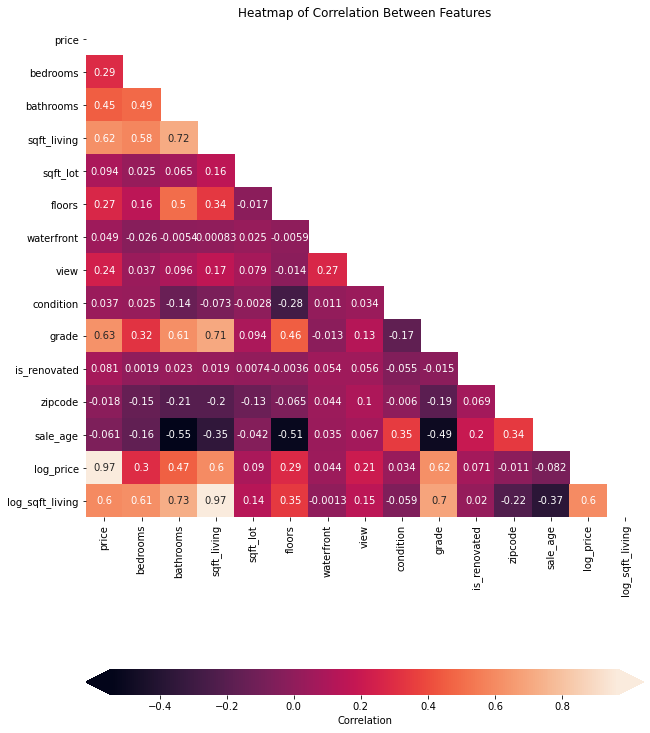

In [35]:
corr = kc.corr()

fig, ax = plt.subplots(figsize=(10, 14))

sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"})
ax.set_title("Heatmap of Correlation Between Features");

In [36]:
second_feature_set = ['bedrooms', 'bathrooms', 'sqft_living', 
                      'sqft_lot', 'floors', 'waterfront', 'view', 
                      'condition', 'grade', 'is_renovated', 'sale_age']
outcome = 'log_price'
predictors = kc[second_feature_set]
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=kc).fit()


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     2136.
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:34:39   Log-Likelihood:                -4639.3
No. Observations:               20439   AIC:                             9303.
Df Residuals:                   20427   BIC:                             9398.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.8567      0.022    502.903      0.000      10.814      10.899
bedrooms        -0.0231      0.003     -7.684      0.000      -0.029      -0.017
bathrooms        0.0809      0.005     15.880      0.000       0.071       0.091
sqft_living      0.0002   5.13e-06     30.821      0.000       0.000       0.000
sqft_lot      4.953e-08   5.43e-08      0.912      0.362   -5.69e-08    1.56e-07
floors           0.0913      0.005     18.210      0.000       0.081       0.101
waterfront       0.1755      0.044      3.953      0.000       0.088       0.262
view             0.0450      0.004     12.619      0.000       0.038       0.052
condition        0.0418      0.004     11.615      0.000       0.035       0.049
grade            0.2093      0.003     65.027      0.000       0.203       0.216
is_renovated     0.0017      0.013      0.132      0.895      -0.024       0.027
sale_age         0.0053      0.000     51.339      0.000       0.005       0.006
==============================================================================
Omnibus:                      175.298   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.312
Skew:                          -0.218   Prob(JB):                     4.25e-40
Kurtosis:                       3.153   Cond. No.                     8.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:

second_model = LinearRegression()
splitter = ShuffleSplit(n_splits=5, test_size=0.4, random_state=7)

baseline_scores = cross_validate(
    estimator=second_model,
    X=kc[second_feature_set],
    y=kc['log_price'],
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.5345182403241777
Validation score: 0.5349575522086358


In [38]:
month_dummies = pd.get_dummies(kc['sale_month'], prefix='sale_month', drop_first=False)
kc_preprocessed = kc.drop(['sale_month'], axis=1)
kc_preprocessed = pd.concat([kc_preprocessed, month_dummies], axis=1)
kc_preprocessed.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'is_renovated', 'zipcode',
       'sale_age', 'log_price', 'log_sqft_living', 'sale_month_Apr',
       'sale_month_Aug', 'sale_month_Dec', 'sale_month_Feb', 'sale_month_Jan',
       'sale_month_Jul', 'sale_month_Jun', 'sale_month_Mar', 'sale_month_May',
       'sale_month_Nov', 'sale_month_Oct', 'sale_month_Sep'],
      dtype='object')

In [39]:
zip_dummies = pd.get_dummies(kc['zipcode'], prefix='zipcode', drop_first=False)
kc_preprocessed.drop('zipcode', axis=1, inplace=True)
kc_preprocessed = pd.concat([kc_preprocessed, zip_dummies], axis=1)
kc_preprocessed.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,1180,5650,1.0,0,1,3,5,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,1,3,5,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,1,3,4,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,1,5,5,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,1,3,6,...,0,0,0,0,0,0,0,0,0,0


In [40]:
kc_viz = kc_preprocessed.copy()
kc_preprocessed.drop(['price', 'sqft_living'], axis=1, inplace=True)

In [41]:
#vashon island
kc_preprocessed.drop(['sale_month_Aug', 'zipcode_98070'], axis=1, inplace=True)


In [42]:
outcome = 'log_price'
predictors = kc_preprocessed.drop(['log_price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [43]:
predictors_int = sm.add_constant(predictors)
model = sm.OLS(kc_preprocessed['log_price'], predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1172.
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:34:39   Log-Likelihood:                 6250.6
No. Observations:               20439   AIC:                        -1.232e+04
Df Residuals:                   20347   BIC:                        -1.159e+04
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.5987      0.042    206.619      0.000       8.517       8.680
bedrooms           -0.0122      0.002     -6.664      0.000      -0.016      -0.009
bathrooms           0.0202      0.003      6.589      0.000       0.014       0.026
sqft_lot         7.427e-07   3.42e-08     21.702      0.000    6.76e-07     8.1e-07
floors             -0.0007      0.003     -0.209      0.835      -0.007       0.006
waterfront          0.3591      0.027     13.360      0.000       0.306       0.412
view                0.0580      0.002     26.813      0.000       0.054       0.062
condition           0.0441      0.002     20.098      0.000       0.040       0.048
grade               0.1065      0.002     53.049      0.000       0.103       0.110
is_renovated        0.0497      0.008      6.494      0.000       0.035       0.065
sale_age            0.0008   7.37e-05     11.406      0.000       0.001       0.001
log_sqft_living     0.4545      0.006     72.633      0.000       0.442       0.467
sale_month_Apr      0.0683      0.006     11.957      0.000       0.057       0.080
sale_month_Dec     -0.0044      0.006     -0.696      0.486      -0.017       0.008
sale_month_Feb      0.0203      0.007      3.044      0.002       0.007       0.033
sale_month_Jan     -0.0033      0.007     -0.455      0.649      -0.017       0.011
sale_month_Jul     -0.0020      0.006     -0.357      0.721      -0.013       0.009
sale_month_Jun      0.0061      0.006      1.067      0.286      -0.005       0.017
sale_month_Mar      0.0450      0.006      7.543      0.000       0.033       0.057
sale_month_May      0.0104      0.006      1.851      0.064      -0.001       0.021
sale_month_Nov     -0.0117      0.006     -1.819      0.069      -0.024       0.001
sale_month_Oct     -0.0082      0.006     -1.377      0.169      -0.020       0.003
sale_month_Sep     -0.0050      0.006     -0.822      0.411      -0.017       0.007
zipcode_98001      -0.3357      0.020    -16.940      0.000      -0.374      -0.297
zipcode_98002      -0.3748      0.022    -17.364      0.000      -0.417      -0.332
zipcode_98003      -0.3289      0.020    -16.062      0.000      -0.369      -0.289
zipcode_98004       0.7104      0.023     31.330      0.000       0.666       0.755
zipcode_98005       0.4062      0.023     17.826      0.000       0.362       0.451
zipcode_98006       0.3024      0.020     15.375      0.000       0.264       0.341
zipcode_98007       0.3046      0.023     13.094      0.000       0.259       0.350
zipcode_98008       0.2927      0.021     14.169      0.000       0.252       0.333
zipcode_98010      -0.0699      0.025     -2.813      0.005      -0.119      -0.021
zipcode_98011       0.1247      0.022      5.753      0.000       0.082       0.167
zipcode_98014      -0.0261      0.024     -1.103      0.270

In [44]:
outcome = 'log_price'
predictors = kc_preprocessed.drop(['log_price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=kc_preprocessed).fit()


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1172.
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:34:40   Log-Likelihood:                 6250.6
No. Observations:               20439   AIC:                        -1.232e+04
Df Residuals:                   20347   BIC:                        -1.159e+04
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.5987      0.042    206.619      0.000       8.517       8.680
bedrooms           -0.0122      0.002     -6.664      0.000      -0.016      -0.009
bathrooms           0.0202      0.003      6.589      0.000       0.014       0.026
sqft_lot         7.427e-07   3.42e-08     21.702      0.000    6.76e-07     8.1e-07
floors             -0.0007      0.003     -0.209      0.835      -0.007       0.006
waterfront          0.3591      0.027     13.360      0.000       0.306       0.412
view                0.0580      0.002     26.813      0.000       0.054       0.062
condition           0.0441      0.002     20.098      0.000       0.040       0.048
grade               0.1065      0.002     53.049      0.000       0.103       0.110
is_renovated        0.0497      0.008      6.494      0.000       0.035       0.065
sale_age            0.0008   7.37e-05     11.406      0.000       0.001       0.001
log_sqft_living     0.4545      0.006     72.633      0.000       0.442       0.467
sale_month_Apr      0.0683      0.006     11.957      0.000       0.057       0.080
sale_month_Dec     -0.0044      0.006     -0.696      0.486      -0.017       0.008
sale_month_Feb      0.0203      0.007      3.044      0.002       0.007       0.033
sale_month_Jan     -0.0033      0.007     -0.455      0.649      -0.017       0.011
sale_month_Jul     -0.0020      0.006     -0.357      0.721      -0.013       0.009
sale_month_Jun      0.0061      0.006      1.067      0.286      -0.005       0.017
sale_month_Mar      0.0450      0.006      7.543      0.000       0.033       0.057
sale_month_May      0.0104      0.006      1.851      0.064      -0.001       0.021
sale_month_Nov     -0.0117      0.006     -1.819      0.069      -0.024       0.001
sale_month_Oct     -0.0082      0.006     -1.377      0.169      -0.020       0.003
sale_month_Sep     -0.0050      0.006     -0.822      0.411      -0.017       0.007
zipcode_98001      -0.3357      0.020    -16.940      0.000      -0.374      -0.297
zipcode_98002      -0.3748      0.022    -17.364      0.000      -0.417      -0.332
zipcode_98003      -0.3289      0.020    -16.062      0.000      -0.369      -0.289
zipcode_98004       0.7104      0.023     31.330      0.000       0.666       0.755
zipcode_98005       0.4062      0.023     17.826      0.000       0.362       0.451
zipcode_98006       0.3024      0.020     15.375      0.000       0.264       0.341
zipcode_98007       0.3046      0.023     13.094      0.000       0.259       0.350
zipcode_98008       0.2927      0.021     14.169      0.000       0.252       0.333
zipcode_98010      -0.0699      0.025     -2.813      0.005      -0.119      -0.021
zipcode_98011       0.1247      0.022      5.753      0.000       0.082       0.167
zipcode_98014      -0.0261      0.024     -1.103      0.270

In [51]:
X_preprocessed = kc_preprocessed.drop(['log_price'],axis=1)
y_preprocessed = kc_preprocessed['log_price']
third_model = LinearRegression()
splitter = ShuffleSplit(n_splits=5, test_size=0.4, random_state=7)

baseline_scores = cross_validate(
    estimator=third_model,
    X=X_preprocessed,
    y=y_preprocessed,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.8398291519271561
Validation score: 0.838250024641934


In [48]:
kc_final = kc_preprocessed.drop(['floors',
                                 'sale_month_Dec',
                                 'sale_month_Jan',
                                 'sale_month_Jul',
                                 'sale_month_Jun',
                                 'sale_month_May',
                                 'sale_month_Nov',
                                 'sale_month_Oct',
                                 'sale_month_Sep',
                                 'zipcode_98014',
                                 'zipcode_98019',
                                 'zipcode_98045',
                                 'zipcode_98056',
                                 'zipcode_98059',
                                 'zipcode_98106',
                                 'zipcode_98108',
                                 'zipcode_98166'],axis=1)                

In [49]:
outcome = 'log_price'
predictors = kc_final.drop(['log_price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=kc_final).fit()


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1438.
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:35:48   Log-Likelihood:                 6222.1
No. Observations:               20439   AIC:                        -1.229e+04
Df Residuals:                   20364   BIC:                        -1.170e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.5694      0.037    229.850      0.000       8.496       8.642
bedrooms           -0.0122      0.002     -6.654      0.000      -0.016      -0.009
bathrooms           0.0194      0.003      6.432      0.000       0.013       0.025
sqft_lot         7.533e-07   3.33e-08     22.639      0.000    6.88e-07    8.19e-07
waterfront          0.3604      0.026     13.710      0.000       0.309       0.412
view                0.0574      0.002     26.661      0.000       0.053       0.062
condition           0.0447      0.002     20.609      0.000       0.040       0.049
grade               0.1064      0.002     53.467      0.000       0.103       0.110
is_renovated        0.0501      0.008      6.549      0.000       0.035       0.065
sale_age            0.0008    6.9e-05     11.597      0.000       0.001       0.001
log_sqft_living     0.4568      0.006     73.347      0.000       0.445       0.469
sale_month_Apr      0.0691      0.004     16.574      0.000       0.061       0.077
sale_month_Feb      0.0214      0.005      3.966      0.000       0.011       0.032
sale_month_Mar      0.0460      0.005     10.223      0.000       0.037       0.055
zipcode_98001      -0.3244      0.010    -31.956      0.000      -0.344      -0.304
zipcode_98002      -0.3631      0.013    -27.347      0.000      -0.389      -0.337
zipcode_98003      -0.3175      0.011    -27.980      0.000      -0.340      -0.295
zipcode_98004       0.7227      0.015     48.329      0.000       0.693       0.752
zipcode_98005       0.4171      0.015     27.620      0.000       0.388       0.447
zipcode_98006       0.3134      0.010     31.886      0.000       0.294       0.333
zipcode_98007       0.3165      0.016     20.031      0.000       0.286       0.347
zipcode_98008       0.3041      0.012     26.100      0.000       0.281       0.327
zipcode_98010      -0.0595      0.018     -3.248      0.001      -0.095      -0.024
zipcode_98011       0.1351      0.013     10.099      0.000       0.109       0.161
zipcode_98022      -0.2805      0.012    -22.480      0.000      -0.305      -0.256
zipcode_98023      -0.3571      0.009    -40.199      0.000      -0.375      -0.340
zipcode_98024       0.1037      0.021      4.853      0.000       0.062       0.146
zipcode_98027       0.1900      0.010     19.344      0.000       0.171       0.209
zipcode_98028       0.0884      0.011      7.805      0.000       0.066       0.111
zipcode_98029       0.2730      0.011     25.008      0.000       0.252       0.294
zipcode_98030      -0.2751      0.012    -23.285      0.000      -0.298      -0.252
zipcode_98031      -0.2535      0.011    -22.083      0.000      -0.276      -0.231
zipcode_98032      -0.3678      0.016    -22.342      0.000      -0.400      -0.335
zipcode_98033       0.4294      0.010     42.500      0.000

In [60]:
X_final = kc_final.drop(['log_price'],axis=1)
y_final = kc_final['log_price']
final_model = LinearRegression()
splitter = ShuffleSplit(n_splits=5, test_size=0.4, random_state=7)

baseline_scores = cross_validate(
    estimator=third_model,
    X=X_final,
    y=y_final,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.839328094137288
Validation score: 0.8382194790105693


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_final, 
                                                    y_final, 
                                                    test_size=0.33, 
                                                    random_state=7)

In [63]:
final_model.fit(X_train, y_train)
mean_squared_error(y_test, final_model.predict(X_test), squared=False)

0.1797832761408946

In [73]:
print(kc.loc[kc['zipcode'] == 98039, 'zipcode'].count())
print(kc.loc[kc['zipcode'] == 98004, 'zipcode'].count())
print(kc.loc[kc['zipcode'] == 98112, 'zipcode'].count())
print(kc.loc[kc['zipcode'] == 98102, 'zipcode'].count())
print(kc.loc[kc['zipcode'] == 98109, 'zipcode'].count())


6
154
167
88
86


In [80]:
top_zips = kc_viz.loc[(kc_viz['zipcode_98004']==1)|(
    kc_viz['zipcode_98112']==1)|(
    kc_viz['zipcode_98102']==1)]
    
top_zips

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
27,667000.0,3,1.00,1400,1581,1.5,0,1,5,6,...,0,0,0,0,0,0,0,0,0,0
66,975000.0,4,2.50,2720,11049,2.0,0,1,3,8,...,0,0,0,0,0,0,0,0,0,0
100,850830.0,3,2.50,2070,13241,1.5,0,1,5,7,...,0,0,0,0,0,0,0,0,0,0
103,1090000.0,3,2.50,2920,8113,2.0,0,1,3,6,...,0,0,0,0,0,0,0,0,0,0
260,780000.0,3,1.00,1660,4400,1.5,0,1,3,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21259,950000.0,2,2.25,2200,2043,2.0,0,1,3,7,...,0,0,0,0,0,0,0,0,0,0
21288,799950.0,3,2.25,1860,1386,3.0,0,1,3,7,...,0,0,0,0,0,0,0,0,0,0
21517,999999.0,3,2.50,2100,4097,2.0,0,1,3,7,...,0,0,0,0,0,0,0,0,0,0
21536,516500.0,1,1.25,1100,638,3.0,0,1,3,7,...,0,0,0,0,0,0,0,0,0,0


In [81]:
bottom_zips = kc_viz.loc[(kc_viz['zipcode_98004']==0)|(
    kc_viz['zipcode_98112']==0)|(
    kc_viz['zipcode_98102']==0)]

In [84]:
bottom_zips['price'] = bottom_zips['price']/1000000
top_zips['price'] = top_zips['price']/1000000

<ipython-input-84-40c02fe4af67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_zips['price'] = top_zips['price']/1000000


In [85]:
x = np.array(kc['sqft_living'])
y = np.array(kc['price']/1000000)
m,b = np.polyfit(x,y,1)

Text(0.5, 0, 'Square Feet of Living Area')

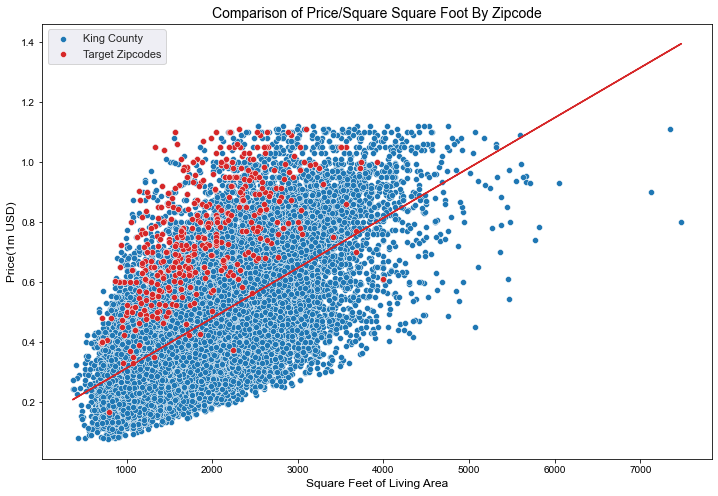

In [86]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_theme(style='darkgrid')
sns.scatterplot(x=bottom_zips['sqft_living'],
                y=bottom_zips['price'], 
                color = "Tab:Blue",
                label='King County')
sns.scatterplot(x=top_zips['sqft_living'],
                y=top_zips['price'],
                color="Tab:Red",label='Target Zipcodes')
plt.plot(x, m*x + b, 
         color = 'tab:red') 
         
ax.set_title("Comparison of Price/Square Square Foot By Zipcode",fontsize=14)
ax.set_ylabel("Price(1m USD)",fontsize=12)
ax.set_xlabel('Square Feet of Living Area',fontsize=12)